In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import parallel_coordinates
from PIL import Image
from io import BytesIO

plt.style.use('classic')
%matplotlib inline

In [2]:
# read excel file
df = pd.read_excel('C:/Anaconda3/projects/oled/oled.xlsx', sheetname='pholed_model')
df = df[list(df.columns)[1:]]
print(df.shape)
df.head()

(172, 32)


homo_HIL  thickness_HIL  lumo_HTL1  homo_HTL1  thickness_HTL1  lumo_HTL2  \
0       5.2           25.0        3.3        5.2               0        3.3   
1       5.2           25.0        3.3        5.2               0        3.3   
2       5.2           25.0        3.3        5.2               0        3.3   
3       5.2           25.0        3.3        5.2               0        3.3   
4       5.2           25.0        3.3        5.2               0        3.3   

   homo_HTL2  thickness_HTL2  lumo_HTL3  homo_HTL3  ...   total_ETL_thickness  \
0        5.2               0        3.3        5.2  ...                    35   
1        5.2               0        3.3        5.2  ...                    35   
2        5.2               0        3.3        5.2  ...                    35   
3        5.2               0        3.3        5.2  ...                    35   
4        5.2               0        3.3        5.2  ...                    35   

   lumo_ETL1  homo_ETL1  thickness_ETL1  lumo_ETL2  homo_ETL2  thickness_ETL2  \
0        2.8        6.2               0        2.8        6.2            35.0   
1        2.8        6.2               0        2.8        6.2            35.0   
2        2.8        6.2               0        2.8        6.2            35.0   
3        2.8        6.2               0        2.8        6.2            35.0   
4        2.8        6.2               0        2.8        6.2            35.0   

   cathode_workfunction  thickness_EIL  cd/A  
0                   2.8           10.0   5.0  
1                   2.8           10.0   4.0  
2                   2.8           10.0   9.0  
3                   2.8           10.0  12.0  
4                   2.8           10.0   8.0  

[5 rows x 32 columns]

In [3]:
#Checking for missing data
NAs = df.isnull().sum()
NAs.sort_values(0, ascending=False)
NAs[NAs > 0]

#drop the missing data
df.dropna(axis=0, inplace=True)
print(df.shape)

(171, 32)


In [4]:
df1 = df[list(df.columns)[:16]]
df1.describe()

homo_HIL  thickness_HIL   lumo_HTL1   homo_HTL1  thickness_HTL1  \
count  171.000000     171.000000  171.000000  171.000000      171.000000   
mean     5.947018      21.125731    2.263977    5.490058       34.678363   
std      1.629183      22.209305    0.336806    0.511015       18.920470   
min      4.700000       0.000000    1.900000    5.100000        0.000000   
25%      5.200000       3.000000    2.000000    5.200000       20.000000   
50%      5.300000      10.000000    2.000000    5.500000       40.000000   
75%      5.700000      40.000000    2.500000    5.500000       45.000000   
max      9.700000      60.000000    3.300000    9.700000       75.000000   

        lumo_HTL2   homo_HTL2  thickness_HTL2   lumo_HTL3   homo_HTL3  \
count  171.000000  171.000000      171.000000  171.000000  171.000000   
mean     2.321871    5.689474        4.660819    2.319532    5.687427   
std      0.296991    0.240600        4.950536    0.304153    0.247287   
min      1.900000    5.100000        0.000000    1.600000    4.900000   
25%      2.000000    5.500000        0.000000    2.000000    5.500000   
50%      2.400000    5.700000        5.000000    2.400000    5.700000   
75%      2.400000    5.900000       10.000000    2.400000    5.900000   
max      3.300000    6.100000       20.000000    3.300000    6.100000   

       thickness_HTL3  total_HTL_thickness  triplet_HTL    LUMO_EML  \
count      171.000000           171.000000   171.000000  171.000000   
mean         0.233918            39.573099     2.759415    2.408129   
std          1.307542            18.922417     0.664880    0.297976   
min          0.000000             0.000000     0.000000    1.740000   
25%          0.000000            30.000000     2.870000    2.215000   
50%          0.000000            40.000000     2.940000    2.400000   
75%          0.000000            50.000000     3.000000    2.565000   
max         10.000000            75.000000     3.140000    3.230000   

         HOMO_EML  triplet_HOST  
count  171.000000    171.000000  
mean     5.986959      2.884211  
std      0.467232      0.144580  
min      5.100000      2.350000  
25%      5.700000      2.760000  
50%      5.900000      2.920000  
75%      6.100000      3.000000  
max      7.530000      3.200000

In [5]:
df2 = df[list(df.columns)[16:]]
df2.describe()

thickness_EML  lumo_dopant  homo_dopant  triplet_dopant  \
count     171.000000   171.000000   171.000000      171.000000   
mean       23.964912     2.963158     5.694211        2.718421   
std         7.497368     0.169558     0.176695        0.066433   
min        10.000000     2.210000     4.950000        2.580000   
25%        20.000000     3.000000     5.700000        2.700000   
50%        25.000000     3.000000     5.700000        2.700000   
75%        30.000000     3.000000     5.700000        2.700000   
max        40.000000     3.160000     6.270000        2.900000   

       dopant_percentage  triplet_ETL  total_ETL_thickness   lumo_ETL1  \
count         171.000000   171.000000           171.000000  171.000000   
mean           10.008772     2.851170            37.052632    2.744561   
std             4.014120     0.272345            10.451717    0.230708   
min             1.000000     2.500000            15.000000    2.260000   
25%             8.000000     2.700000            30.000000    2.700000   
50%            10.000000     2.750000            35.000000    2.730000   
75%            12.000000     2.800000            40.000000    2.800000   
max            28.000000     3.400000            90.000000    3.500000   

        homo_ETL1  thickness_ETL1   lumo_ETL2   homo_ETL2  thickness_ETL2  \
count  171.000000      171.000000  171.000000  171.000000      171.000000   
mean     6.615029        1.783626    2.786316    6.586959       35.269006   
std      0.295385        5.275356    0.236981    0.306464        9.793042   
min      5.850000        0.000000    2.260000    5.850000        3.000000   
25%      6.300000        0.000000    2.730000    6.300000       30.000000   
50%      6.680000        0.000000    2.730000    6.680000       35.000000   
75%      6.800000        0.000000    2.800000    6.680000       40.000000   
max      7.500000       30.000000    3.500000    7.500000       70.000000   

       cathode_workfunction  thickness_EIL        cd/A  
count            171.000000     171.000000  171.000000  
mean               3.366667       1.827485   27.095641  
std                0.399647       2.785383   13.578534  
min                2.200000       0.000000    2.000000  
25%                2.900000       1.000000   18.060000  
50%                3.500000       1.000000   26.479487  
75%                3.500000       1.500000   36.150000  
max                4.300000      15.000000   64.379487

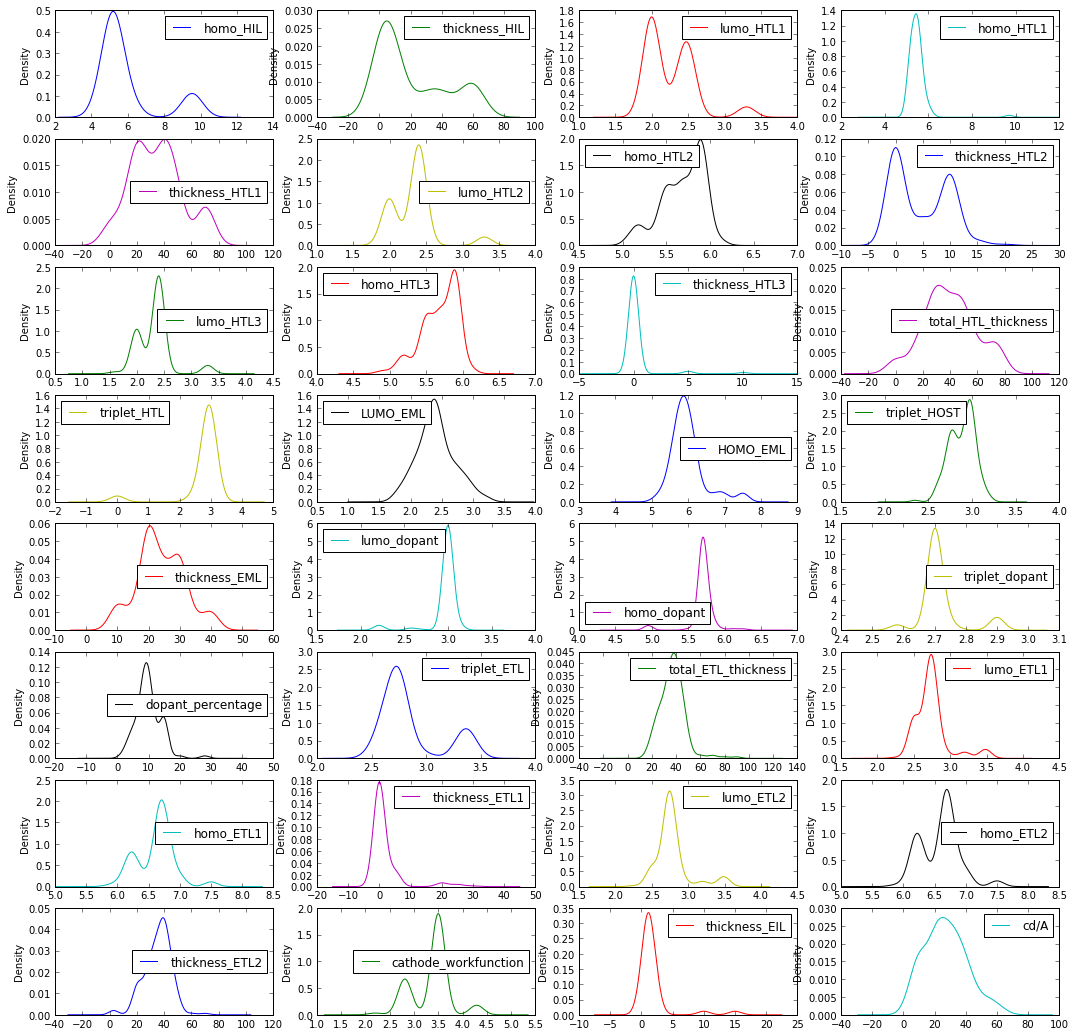

In [6]:
plt.rcParams['figure.figsize'] = (18.0, 18.0)
df.plot(kind='density', subplots=True, layout=(8,4), sharex=False);
plt.savefig('density.png', format='png', dpi=300)

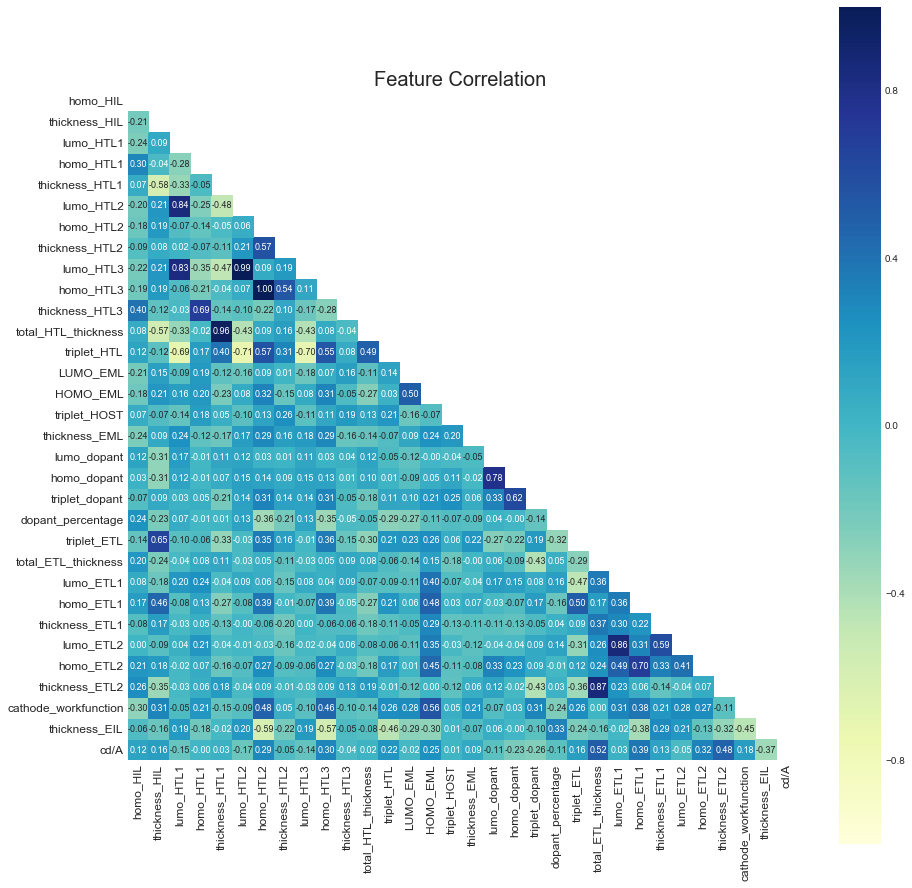

List the features in descending order of their correlation with cd/A:

total_ETL_thickness:   0.5151859297590584
thickness_ETL2:   0.47717443751687405
homo_ETL1:   0.38559970416683403
thickness_EIL:   -0.36627068741240104
homo_ETL2:   0.31807552753645396
homo_HTL3:   0.2995953372287079
homo_HTL2:   0.2922743093026993
triplet_dopant:   -0.2602452257150455
HOMO_EML:   0.24813664287521142
homo_dopant:   -0.2309922224079734
triplet_HTL:   0.2182613260731143
cathode_workfunction:   0.178623974649089
lumo_HTL2:   -0.16589271276598427
thickness_HIL:   0.15821501941644725
triplet_ETL:   0.15681361853248338
lumo_HTL1:   -0.1515274513704681
lumo_HTL3:   -0.14249119208852992
thickness_ETL1:   0.13488911463251466
homo_HIL:   0.12033603428766024
lumo_dopant:   -0.10721483005203722
dopant_percentage:   -0.10600640419090115
thickness_EML:   0.08690342652594052
thickness_HTL2:   -0.05473806735608955
lumo_ETL2:   -0.045875319817903014
thickness_HTL3:   -0.036685184800826776
thickness_HTL1:   0.03444973

In [7]:
X = df[list(df.columns)[:]]

corr = X.select_dtypes(include = ['float64', 'int64']).iloc[:, :].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(15, 15))
    sns.heatmap(corr, vmax=1, square=True, cmap="YlGnBu",linecolor='black', mask=mask, annot=True, fmt = '.2f', 
                annot_kws={"size":9})
    plt.yticks(rotation=0,fontsize=12)
    plt.xticks(rotation=90,fontsize=12)
    plt.title('Feature Correlation ',fontsize=20)
#     plt.savefig('heatmap.png', format='png', dpi=600)
    plt.show();

cor_dict = corr['cd/A'].to_dict()
del cor_dict['cd/A']
print("List the features in descending order of their correlation with cd/A:\n")
for ele in sorted(cor_dict.items(), key=lambda x: -abs(x[1])):
    print("{0}:   {1}".format(*ele))

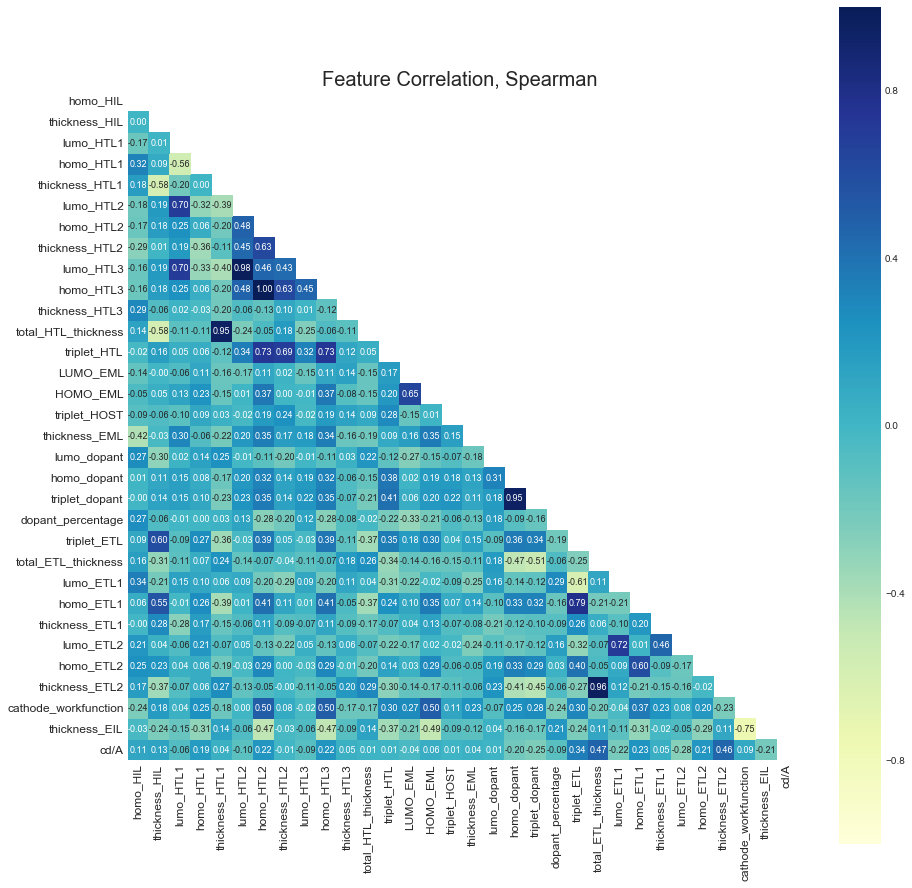

List the features in descending order of their correlation with cd/A:

total_ETL_thickness:   0.4708093356812389
thickness_ETL2:   0.4627408329916558
triplet_ETL:   0.34023227250464316
lumo_ETL2:   -0.2807722526625044
triplet_dopant:   -0.24766708908411386
homo_ETL1:   0.23287652172778897
homo_HTL3:   0.22146877642238072
lumo_ETL1:   -0.2213036062755817
homo_HTL2:   0.21720617086804578
thickness_EIL:   -0.2104249622369202
homo_ETL2:   0.20744425934089714
homo_dopant:   -0.20172612762502856
homo_HTL1:   0.18744304528819986
thickness_HIL:   0.13255428158170943
homo_HIL:   0.11139748846918326
lumo_HTL2:   -0.10362804641237718
dopant_percentage:   -0.0940403287075193
cathode_workfunction:   0.09130385346772216
lumo_HTL3:   -0.09052586499101911
lumo_HTL1:   -0.06438955256932988
HOMO_EML:   0.0581516831448286
thickness_ETL1:   0.048010080825504106
thickness_HTL3:   0.04592044590012061
thickness_HTL1:   0.039248855127004344
LUMO_EML:   -0.038347359546707704
thickness_EML:   0.0350870015550508

In [8]:
corr = X.select_dtypes(include = ['float64', 'int64']).iloc[:, :].corr(method='spearman')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(15, 15))
    sns.heatmap(corr, vmax=1, square=True, cmap="YlGnBu",linecolor='black', mask=mask, annot=True, fmt = '.2f', 
                annot_kws={"size":9})
    plt.yticks(rotation=0,fontsize=12)
    plt.xticks(rotation=90,fontsize=12)
    plt.title('Feature Correlation, Spearman ',fontsize=20)
#     plt.savefig('heatmap.png', format='png', dpi=600)
    plt.show();

cor_dict = corr['cd/A'].to_dict()
del cor_dict['cd/A']
print("List the features in descending order of their correlation with cd/A:\n")
for ele in sorted(cor_dict.items(), key=lambda x: -abs(x[1])):
    print("{0}:   {1}".format(*ele))

In [9]:
X = df.iloc[:, :-1]
y = df[['cd/A']]
print(X.shape)
X.head()

(171, 31)


homo_HIL  thickness_HIL  lumo_HTL1  homo_HTL1  thickness_HTL1  lumo_HTL2  \
0       5.2           25.0        3.3        5.2               0        3.3   
1       5.2           25.0        3.3        5.2               0        3.3   
2       5.2           25.0        3.3        5.2               0        3.3   
3       5.2           25.0        3.3        5.2               0        3.3   
4       5.2           25.0        3.3        5.2               0        3.3   

   homo_HTL2  thickness_HTL2  lumo_HTL3  homo_HTL3      ...        \
0        5.2               0        3.3        5.2      ...         
1        5.2               0        3.3        5.2      ...         
2        5.2               0        3.3        5.2      ...         
3        5.2               0        3.3        5.2      ...         
4        5.2               0        3.3        5.2      ...         

   triplet_ETL  total_ETL_thickness  lumo_ETL1  homo_ETL1  thickness_ETL1  \
0          2.6                   35        2.8        6.2               0   
1          2.6                   35        2.8        6.2               0   
2          2.6                   35        2.8        6.2               0   
3          2.6                   35        2.8        6.2               0   
4          2.6                   35        2.8        6.2               0   

   lumo_ETL2  homo_ETL2  thickness_ETL2  cathode_workfunction  thickness_EIL  
0        2.8        6.2            35.0                   2.8           10.0  
1        2.8        6.2            35.0                   2.8           10.0  
2        2.8        6.2            35.0                   2.8           10.0  
3        2.8        6.2            35.0                   2.8           10.0  
4        2.8        6.2            35.0                   2.8           10.0  

[5 rows x 31 columns]

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=27)

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, LeaveOneOut

regressor = RandomForestRegressor(random_state=7, n_estimators=110)
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

kfold = KFold(n_splits=5, shuffle=True, random_state=7)
loo = LeaveOneOut()
r2_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('R2 scores: ', r2_scores)
print('mean R2 score: ', r2_scores.mean(), '\n')

mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=loo, scoring='neg_mean_squared_error')
# print('MSE scores: ', -mse_scores)
print('mean MSE score: ', -mse_scores.mean())
print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R2 scores:  [ 0.75336721  0.36980346  0.56708785  0.72501597  0.73890533]
mean R2 score:  0.630835962602 

mean MSE score:  61.0621579876
RMSE mean:  7.81422792012 

R-squared test:  0.66016272651
MS Error:  59.8896489835
RMSE:  7.73884028673


In [12]:
importance = regressor.feature_importances_.tolist()
names = list(X)

importance, names = zip(*sorted(zip(importance, names), reverse=True))
importance = [round(float(i), 3) for i in importance]

fmt = '{:<8}{:<20}{}'
print(fmt.format('', 'column', 'importance'))
for i, (name, coef) in enumerate(zip(names, importance)):
    print(fmt.format(i, name, coef))

        column              importance
0       triplet_ETL         0.288
1       total_ETL_thickness 0.106
2       thickness_EIL       0.077
3       triplet_HOST        0.068
4       HOMO_EML            0.068
5       LUMO_EML            0.041
6       lumo_ETL1           0.032
7       homo_ETL2           0.029
8       thickness_ETL2      0.027
9       homo_ETL1           0.025
10      thickness_HIL       0.022
11      thickness_EML       0.022
12      dopant_percentage   0.021
13      thickness_HTL1      0.019
14      lumo_ETL2           0.017
15      total_HTL_thickness 0.016
16      thickness_HTL2      0.013
17      thickness_ETL1      0.013
18      homo_HTL3           0.013
19      triplet_dopant      0.011
20      homo_HIL            0.011
21      homo_dopant         0.01
22      lumo_HTL1           0.01
23      homo_HTL1           0.009
24      triplet_HTL         0.008
25      lumo_dopant         0.007
26      homo_HTL2           0.007
27      cathode_workfunction0.007
28      lum

(array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ]),
 <a list of 7 Text xticklabel objects>)

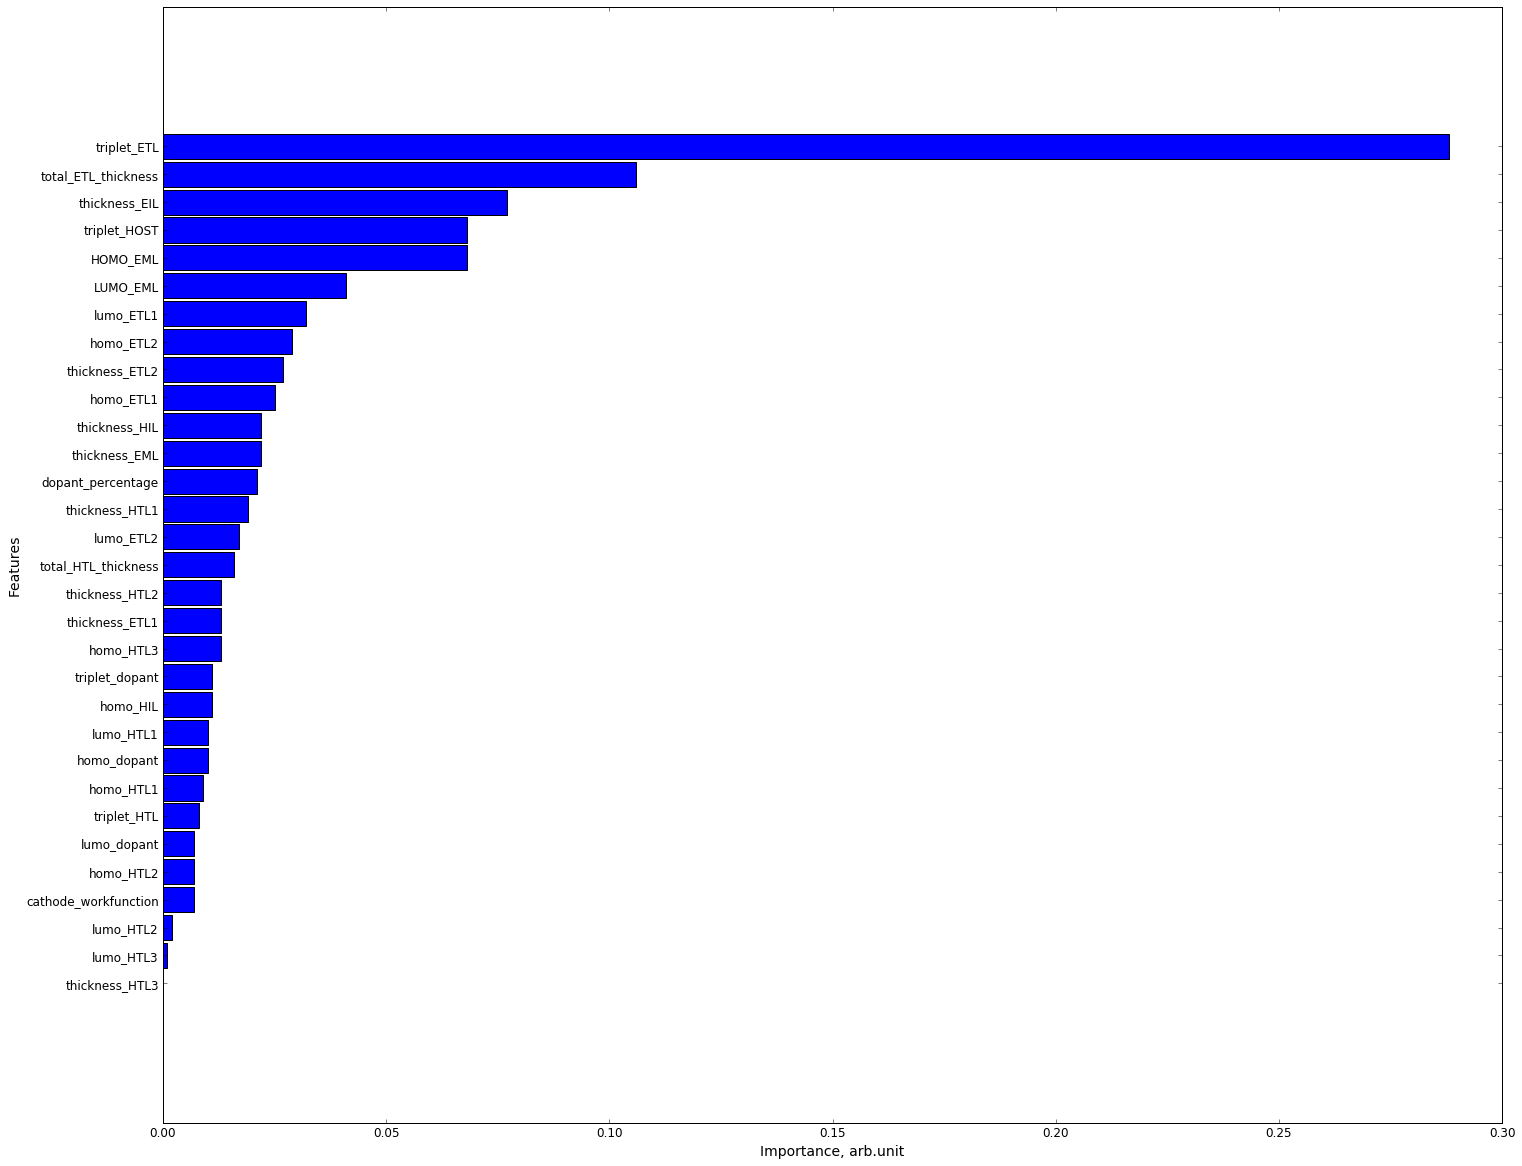

In [14]:
# plt.rcdefaults()

importance, names = zip(*sorted(zip(importance, names), reverse=False))
x = np.arange(31)
plt.figure(figsize=(24,20));
fig = plt.barh(x, importance, 0.9, align='center')
plt.xlabel('Importance, arb.unit',fontsize=14)
plt.ylabel('Features',fontsize=14)
plt.yticks(x,names,fontsize=12)
plt.xticks( fontsize=12)
# plt.savefig('importanc3.png', format='png', dpi=300);

In [15]:

# # plt.savefig('importanc3e.png', format='png', dpi=300);
# png1 = BytesIO()
# # (2) load this image into PIL
# png2 = Image.open('importanc3.png')

# # (3) save as TIFF
# png2.save('importance.tiff')
# png1.close()

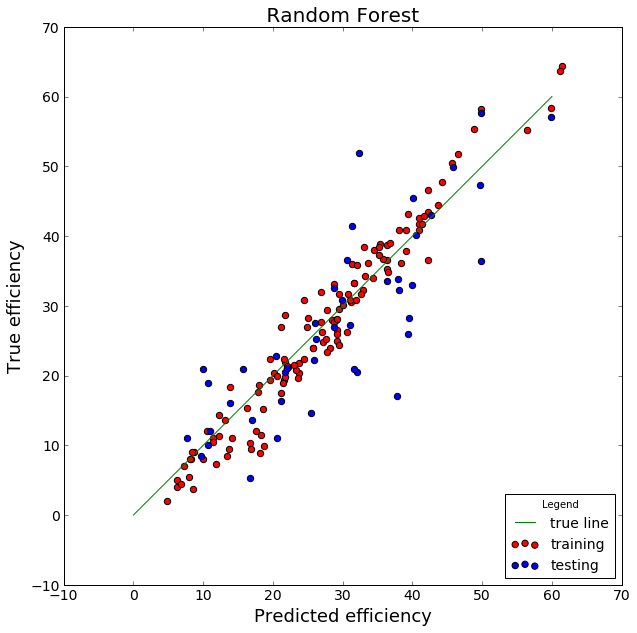

In [17]:
pred_train = regressor.predict(X_train)

plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.scatter(pred_train, y_train, c='r', s=40, label='training')
plt.scatter(y_predictions, y_test, c='b', s=40, label='testing')
plt.plot([0, 60], [-0,60], 'g-', label='true line')
plt.legend(loc=4, frameon=True, title='Legend', fontsize=14);
plt.ylabel('True efficiency', fontsize=18)
plt.xlabel('Predicted efficiency', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(' Random Forest ',fontsize=20)
plt.xticks(fontsize=14)
plt.show()

In [42]:
# plt.scatter(pred_train, y_train, c='r', s=40, label='training')
# plt.scatter(y_predictions, y_test, c='b', s=40, label='testing')

trainplot= pd.DataFrame({'pred_train': pred_train, 'y_train': np.array(y_train).ravel()})
testplot= pd.DataFrame({'y_predictions': y_predictions, 'y_test': np.array(y_test).ravel()})
trainplot.to_csv('trainplot.csv')


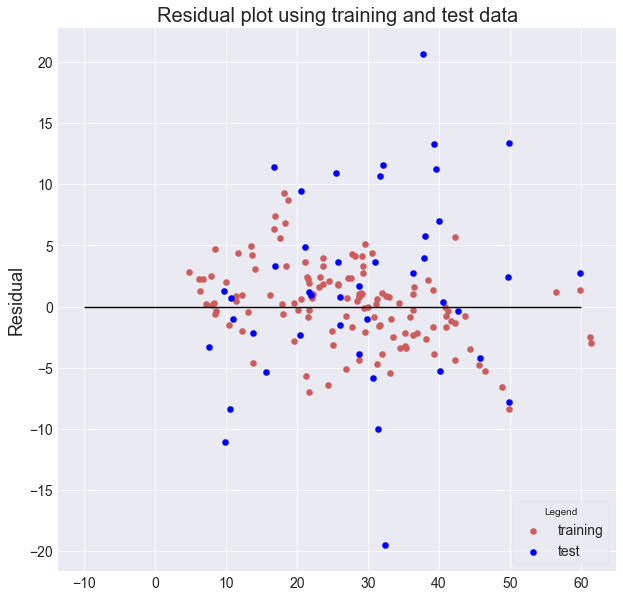

In [16]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train).reshape(len(X_train))-y_train.values.reshape(len(y_train)),
            c='indianred', s=40, label='training')
plt.scatter(regressor.predict(X_test), regressor.predict(X_test).reshape(len(X_test))-np.asarray(y_test).reshape(len(y_test)), 
            c='b', s=40, label ='test')
plt.hlines(y=0, xmin=-10, xmax=60)
plt.title('Residual plot using training and test data', fontsize=20)
plt.ylabel('Residual',fontsize=18 )
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc=4, frameon=True, title='Legend', fontsize=14);

In [17]:
# Save Model Using Pickle
import pickle

# save the model to disk
filename = 'pholed_rf_model.sav'
pickle.dump(regressor, open(filename, 'wb'))

In [18]:
new_X = X.drop(['thickness_HTL3', 'lumo_HTL2', 'lumo_HTL3'], axis=1)

y = df[['cd/A']]
print(new_X.shape)
new_X.head()

(171, 28)


homo_HIL  thickness_HIL  lumo_HTL1  homo_HTL1  thickness_HTL1  homo_HTL2  \
0       5.2           25.0        3.3        5.2               0        5.2   
1       5.2           25.0        3.3        5.2               0        5.2   
2       5.2           25.0        3.3        5.2               0        5.2   
3       5.2           25.0        3.3        5.2               0        5.2   
4       5.2           25.0        3.3        5.2               0        5.2   

   thickness_HTL2  homo_HTL3  total_HTL_thickness  triplet_HTL      ...        \
0               0        5.2                    0          0.0      ...         
1               0        5.2                    0          0.0      ...         
2               0        5.2                    0          0.0      ...         
3               0        5.2                    0          0.0      ...         
4               0        5.2                    0          0.0      ...         

   triplet_ETL  total_ETL_thickness  lumo_ETL1  homo_ETL1  thickness_ETL1  \
0          2.6                   35        2.8        6.2               0   
1          2.6                   35        2.8        6.2               0   
2          2.6                   35        2.8        6.2               0   
3          2.6                   35        2.8        6.2               0   
4          2.6                   35        2.8        6.2               0   

   lumo_ETL2  homo_ETL2  thickness_ETL2  cathode_workfunction  thickness_EIL  
0        2.8        6.2            35.0                   2.8           10.0  
1        2.8        6.2            35.0                   2.8           10.0  
2        2.8        6.2            35.0                   2.8           10.0  
3        2.8        6.2            35.0                   2.8           10.0  
4        2.8        6.2            35.0                   2.8           10.0  

[5 rows x 28 columns]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(new_X, y,test_size=0.25, random_state=27)

In [20]:
regressor = RandomForestRegressor(random_state=7,n_estimators=110)
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

kfold = KFold(n_splits=5, shuffle=True, random_state=7)
loo = LeaveOneOut()
r2_scores = cross_val_score(regressor, new_X, y.values.ravel(), cv=kfold)
print('R2 scores: ', r2_scores)
print('mean R2 score: ', r2_scores.mean(), '\n')

mse_scores = cross_val_score(regressor, new_X, y.values.ravel(), cv=loo, scoring='neg_mean_squared_error')
# print('MSE scores: ', -mse_scores)
print('mean MSE score: ', -mse_scores.mean())
print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R2 scores:  [ 0.74649949  0.3628585   0.57365304  0.72317139  0.73238716]
mean R2 score:  0.627713915205 

mean MSE score:  59.9991175306
RMSE mean:  7.74590972905 

R-squared test:  0.659277931699
MS Error:  60.0455767018
RMSE:  7.74890809739


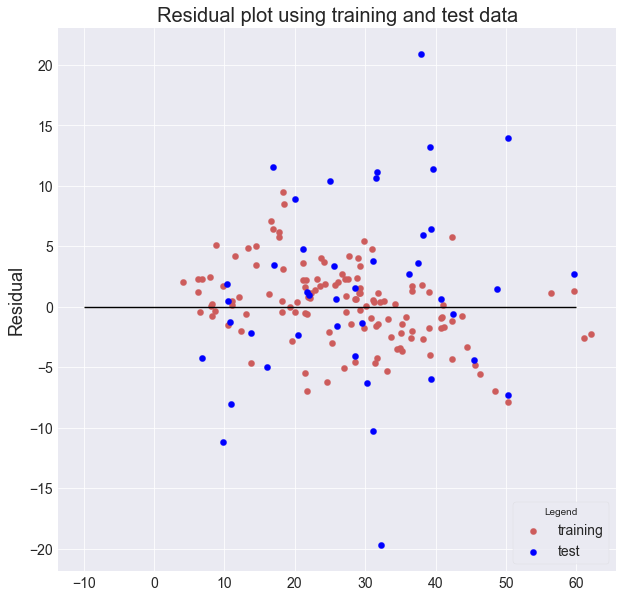

In [21]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train).reshape(len(X_train))-y_train.values.reshape(len(y_train)),
            c='indianred', s=40, label='training')
plt.scatter(regressor.predict(X_test), regressor.predict(X_test).reshape(len(X_test))-np.asarray(y_test).reshape(len(y_test)), 
            c='b', s=40, label ='test')
plt.hlines(y=0, xmin=-10, xmax=60)
plt.title('Residual plot using training and test data', fontsize=20)
plt.ylabel('Residual',fontsize=18 )
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc=4, frameon=True, title='Legend', fontsize=14);

# Using other algorithm

In [12]:
from xgboost import XGBRegressor

regressor = XGBRegressor()
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

kfold = KFold(n_splits=5, shuffle=True, random_state=7)
loo = LeaveOneOut()
r2_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('R2 scores: ', r2_scores)
print('mean R2 score: ', r2_scores.mean(), '\n')

mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=loo, scoring='neg_mean_squared_error')
# print('MSE scores: ', -mse_scores)
print('mean MSE score: ', -mse_scores.mean())
print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


R2 scores:  [ 0.6720153   0.29391504  0.54860921  0.65620069  0.68179387]
mean R2 score:  0.570506822549 

mean MSE score:  72.2217648071
RMSE mean:  8.498338944 

R-squared test:  0.619716841806
MS Error:  67.0174422737
RMSE:  8.18641815898


In [13]:
from sklearn.ensemble import AdaBoostRegressor

regressor = AdaBoostRegressor()
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

kfold = KFold(n_splits=5, shuffle=True, random_state=7)
loo = LeaveOneOut()
r2_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('R2 scores: ', r2_scores)
print('mean R2 score: ', r2_scores.mean(), '\n')

mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=loo, scoring='neg_mean_squared_error')
# print('MSE scores: ', -mse_scores)
print('mean MSE score: ', -mse_scores.mean())
print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R2 scores:  [ 0.63791142  0.41280783  0.48259568  0.56426224  0.69992871]
mean R2 score:  0.559501174951 

mean MSE score:  76.6872321546
RMSE mean:  8.75712465108 

R-squared test:  0.583627778603
MS Error:  73.3774312918
RMSE:  8.56606276488


In [14]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor(n_neighbors=8)
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

kfold = KFold(n_splits=5, shuffle=True, random_state=7)
loo = LeaveOneOut()
r2_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('R2 scores: ', r2_scores)
print('mean R2 score: ', r2_scores.mean(), '\n')

mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=loo, scoring='neg_mean_squared_error')
# print('MSE scores: ', -mse_scores)
print('mean MSE score: ', -mse_scores.mean())
print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R2 scores:  [ 0.25483918  0.20673403  0.25249159  0.36206759  0.54704975]
mean R2 score:  0.324636426668 

mean MSE score:  102.891148519
RMSE mean:  10.1435274199 

R-squared test:  0.483568549957
MS Error:  91.0109063361
RMSE:  9.53996364438


In [15]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor()
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

kfold = KFold(n_splits=5, shuffle=True, random_state=7)
loo = LeaveOneOut()
r2_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('R2 scores: ', r2_scores)
print('mean R2 score: ', r2_scores.mean(), '\n')

mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=loo, scoring='neg_mean_squared_error')
# print('MSE scores: ', -mse_scores)
print('mean MSE score: ', -mse_scores.mean())
print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))

R2 scores:  [ 0.72429773  0.29548404  0.56576792  0.71021399  0.66606073]
mean R2 score:  0.592364880694 

mean MSE score:  68.3618660371
RMSE mean:  8.26812348947 

R-squared test:  0.615287762018
MS Error:  67.7979806506
RMSE:  8.23395291768


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

regressor = AdaBoostRegressor()
regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

kfold = KFold(n_splits=5, shuffle=True, random_state=7)
loo = LeaveOneOut()
r2_scores = cross_val_score(regressor, X, y.values.ravel(), cv=kfold)
print('R2 scores: ', r2_scores)
print('mean R2 score: ', r2_scores.mean(), '\n')

mse_scores = cross_val_score(regressor, X, y.values.ravel(), cv=loo, scoring='neg_mean_squared_error')
# print('MSE scores: ', -mse_scores)
print('mean MSE score: ', -mse_scores.mean())
print('RMSE mean: ', np.sqrt(-mse_scores.mean()) , '\n')

# Check how our model is doing on test set
print('R-squared test: ', regressor.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))